In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Read the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data_full = train_data.copy()
# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['Transported'], inplace=True)
y_train = train_data.Transported
print(y_train.shape)
train_data.drop(['Transported'], axis=1, inplace=True)

# submission_id= train_data['# feature for result #'] #<- only necessary based on submitting format
train_len = len(train_data)
X = pd.concat([train_data,test_data], axis=0)

In [69]:
print('shape of data frame: ', X.shape)
print(X.describe())
X

shape of data frame:  (12970, 13)
                Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  12700.000000  12707.000000  12681.000000  12664.000000  12686.000000   
mean      28.771969    222.897852    451.961675    174.906033    308.476904   
std       14.387261    647.596664   1584.370747    590.558690   1130.279641   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       19.000000      0.000000      0.000000      0.000000      0.000000   
50%       27.000000      0.000000      0.000000      0.000000      0.000000   
75%       38.000000     49.000000     77.000000     29.000000     57.000000   
max       79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count  12702.000000  
mean     306.789482  
std     1180.097223  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       42.000000  
max    24133.000000  


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [70]:
X.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [71]:
X.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [72]:
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numeric_features = [col for col in X.columns if X[col].dtype == 'float64']
print("numeric features: ", numeric_features, '\n')
print("categorical features: ", categorical_features, '\n')

numeric features:  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 

categorical features:  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'] 


In [73]:
X.isna().sum().sort_values(ascending=False)

CryoSleep       310
ShoppingMall    306
Cabin           299
VIP             296
Name            294
FoodCourt       289
HomePlanet      288
Spa             284
Destination     274
Age             270
VRDeck          268
RoomService     263
PassengerId       0
dtype: int64

# Univariate data analysis 

In [74]:
def plot_numeric(df, feature, target=None):
    # Create a 1x3 grid of subplots
    fig, axes = plt.subplots(1, 3, figsize=(12, 5)) 
    
    # First subplot (histogram + kde)
    sns.histplot(df[feature], kde=True, kde_kws=dict(cut=4), ax=axes[0])
    axes[0].set_title("{} hist & kde distribution".format(feature))
    axes[0].set_xlabel("{}".format(feature))
    axes[0].set_ylabel('count')
    
    # Second subplot (box plot)
    df[feature].plot(kind='box', ax=axes[1])
    axes[1].set_title("{} box plot".format(feature))
    
    
    # sometimes this graph is not very informative, works best for a low distribution value with low skew
    if target is not None:
        sns.histplot(data=df, x=feat, hue=target, ax=axes[2])
        axes[2].set_title("{} hist & kde distribution".format(feature))
        axes[2].set_xlabel("{}".format(feature))
        axes[2].set_ylabel('count')
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plots
    plt.show()

In [75]:
# for feat in numeric_features:
    # plot_numeric(train_data_full, feat ,'Transported')

In [76]:
X.Spa.head()

0       0.0
1     549.0
2    6715.0
3    3329.0
4     565.0
Name: Spa, dtype: float64

In [77]:
print('number of missing values for spa:', X['Spa'].isna().sum() ,'\n')
print('% of missing values for spa:', X['Spa'].isna().sum()/len(X['Spa'])*100 ,'\n')

print(X['Spa'].dropna().describe())

number of missing values for spa: 284 

% of missing values for spa: 2.1896684656900542 

count    12686.000000
mean       308.476904
std       1130.279641
min          0.000000
25%          0.000000
50%          0.000000
75%         57.000000
max      22408.000000
Name: Spa, dtype: float64


In [78]:
# X['log_spa'] = X['Spa'].apply(np.log1p)
# X.log_spa


In [79]:
# plot_numeric(X,'log_spa')

In [80]:
object_nunique = list(map(lambda col: X[col].nunique(), categorical_features))
d = dict(zip(categorical_features, object_nunique))
d


{'PassengerId': 12970,
 'HomePlanet': 3,
 'CryoSleep': 2,
 'Cabin': 9825,
 'Destination': 3,
 'VIP': 2,
 'Name': 12629}

In [81]:
low_card = ['HomePlanet','CryoSleep', 'Destination', 'VIP']
high_card = ['Cabin', 'Name']

def analyse_high_cardinality (df, feat):
    print('-------------Analysis of {} ----------\n'.format(feat))
    print('General Description of {}\n'.format(feat), df[feat].dropna().describe(), '\n')
    print('Number of Duplicates in {}\n'.format(feat), df[feat].duplicated().sum(), '\n')
    print('Value Counts in {}\n'.format(feat), df[feat].value_counts(), '\n')
    print('Number of missing values in {}:'.format(feat), df[feat].nunique(), '\n')
    

def analyse_low_cardinality(df, feat, target=None):
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    df[feat].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title("{} Value Counts (Bar)".format(feat))
    axes[0].set_xlabel("{}".format(feat))
    axes[0].set_ylabel("Count")

    df[feat].value_counts().plot(kind='pie', autopct='%0.1f%%', ax=axes[1])
    axes[1].set_title("{} Value Counts (Pie)".format(feat))
    if target is not None:
        # Third subplot (bar)
        sns.countplot(data=df, x=feat, hue=target, ax=axes[2])
        axes[2].set_title("{} Value Counts with Hue (Bar)".format(feat))
        axes[2].set_xlabel("{}".format(feat))
        axes[2].set_ylabel("Count")


    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()
    
    print('-------------Analysis of {} ----------\n'.format(feat))
    print('Value Counts in {}\n'.format(feat), df[feat].value_counts(), '\n')
    print('Number of missing values in {}:'.format(feat), df[feat].nunique(), '\n')

In [82]:
# for feat in high_card:
#     analyse_high_cardinality(X, feat)
# 
# for feat in low_card:
#     analyse_low_cardinality(train_data_full,feat,'Transported')

# baseline

In [83]:
X_baseline = X.copy()
y_baseline = y_train.copy()
X_baseline = X_baseline[:train_len]

# removing high cardinality features for baseline analysis - names and cabin and id  
X_baseline = X_baseline.drop(['PassengerId','Cabin', 'Name'], axis=1)
X_baseline


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


for the baseline ill use the best model for structured data, XGBclassifier.
- first lets look at the accuracy score with basic ordinal encoding and no CV 

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


In [85]:
X_bl1 = X_baseline.copy()
y_bl1 = y_baseline.copy()
# Label encoding for categoricals
for colname in X_bl1.select_dtypes(["category", "object"]):
    X_bl1[colname], _ = X_bl1[colname].factorize()
    
# Load and preprocess your dataset 
X_train, X_valid, y_train, y_valid = train_test_split(X_bl1, y_bl1, train_size=0.75, test_size=0.25, random_state=42)

model = XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
print(accuracy_score(y_pred,y_valid))

0.7746090156393745


- with 5 fold CV

In [86]:
def get_score_XGB(X, y, k=5, model=XGBClassifier()):
    # Label encoding for categoricals
    X_scope = X.copy()
    y_scope = y.copy()
    for colname in X_scope.select_dtypes(["category", "object"]):
        X_scope[colname], _ = X_scope[colname].factorize()
    score = cross_val_score(
        model, X_scope, y_scope, cv=k, scoring="accuracy",
    )
    score = score.mean()
    return score
X_bl2 = X_baseline.copy()
y_bl2 = y_baseline.copy()
print(get_score_XGB(X_bl2,y_bl2,5))

0.7876468957266157


- with pipelines and one-hot encoding

In [87]:
X_baseline

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [88]:
one_hot_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
mean_features = numeric_features
X_bl3 = X_baseline.copy()
y_bl3 = y_baseline.copy()

# Create transformers for different types of features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Create a column transformer to apply the appropriate transformers to the features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, one_hot_features),
        ('num', numerical_transformer, mean_features)
    ])

# Create a final pipeline with preprocessing and your machine learning model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', XGBClassifier())])

score = cross_val_score(
    pipeline, X_bl3, y_bl3, cv=5, scoring="accuracy",
)
print(score.mean())

0.785231317550197


- Baseline accuracy of model using the 3 different methods is: 1) 77.4% 2) 78.6%  3) 78.5% 

# Missing Values

In [89]:
X.isna().sum().sort_values(ascending=False)


CryoSleep       310
ShoppingMall    306
Cabin           299
VIP             296
Name            294
FoodCourt       289
HomePlanet      288
Spa             284
Destination     274
Age             270
VRDeck          268
RoomService     263
PassengerId       0
dtype: int64

In [90]:
print(numeric_features)
print(categorical_features)
print(high_card)
print(low_card)
X

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
['Cabin', 'Name']
['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [91]:
def numeric_fill(X,col):
    mean = X[col].mean()
    X[col].fillna(mean, inplace=True)
def categorical_fill(X,col):
    if col in high_card:
        X[col].fillna('Unknown',inplace=True)
    else:
        X[col].fillna(X[col].mode()[0],inplace=True)

In [92]:
for col in numeric_features:
    numeric_fill(X,col)
for col in categorical_features:
    categorical_fill(X,col)

In [93]:
X.isna().sum().sort_values(ascending=False)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [94]:
X

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,Unknown,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.771969,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [95]:
train_data_full

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [96]:
train_data_full[['HomePlanet','Transported']].groupby('HomePlanet').mean().sort_values(by='Transported',ascending=False)

,Transported
HomePlanet,
Europa,0.658846
Mars,0.523024
Earth,0.423946


In [97]:
train_data_full[['CryoSleep','Transported']].groupby('CryoSleep').mean().sort_values(by='Transported',ascending=False)


,Transported
CryoSleep,
True,0.817583
False,0.328921


In [98]:
train_data_full[['Destination','Transported']].groupby('Destination').mean().sort_values(by='Transported',ascending=False)


,Transported
Destination,
55 Cancri e,0.610000
PSO J318.5-22,0.503769
TRAPPIST-1e,0.471175


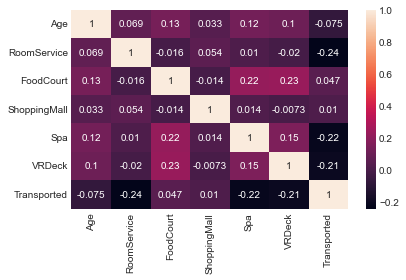

In [99]:
sns.heatmap(train_data_full.corr(), annot = True)
plt.show()

In [100]:
X.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [101]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# 
# class AgeImputer(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         imputer = SimpleImputer(strategy='mean')
#         X['Age'] = imputer.fit_transform(X[['Age']])
#         return X
# class FeatureOHEncoder(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
#     def transform(self,X):
#         OHencoder = OneHotEncoder()
#         
#     

# feature Engineering 

In [102]:
get_score_XGB(train_data,train_data_full.Transported)

0.6042833103161678

In [103]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes - important for the sklearn library
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

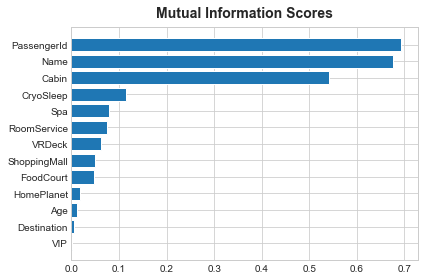

In [104]:
X_mi = X[:train_len].copy()
y_mi = train_data_full.Transported.copy()
scores = make_mi_scores(X_mi,y_mi)
plot_mi_scores(scores)

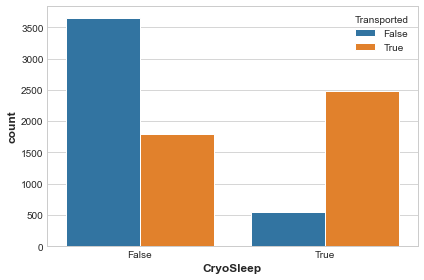

In [105]:
sns.countplot(data=train_data_full, x="CryoSleep", hue="Transported")
plt.show()

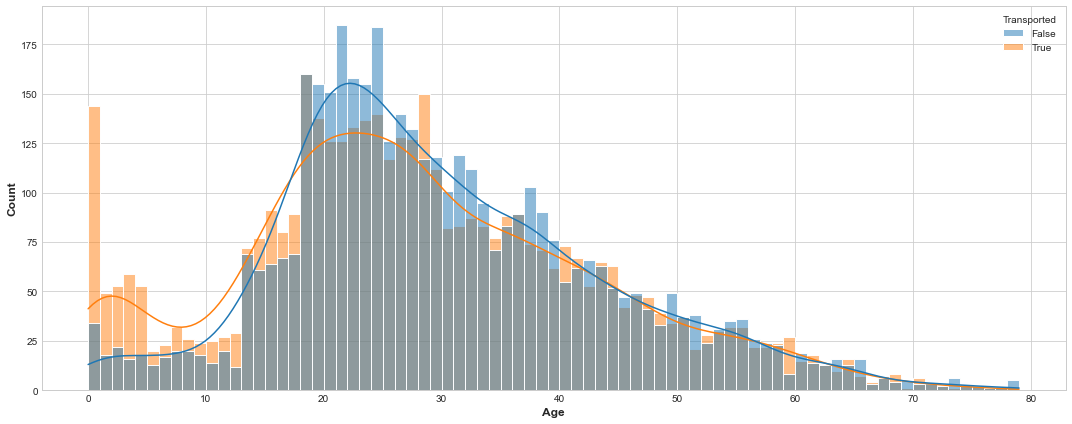

In [106]:
plt.figure(figsize=(15,6))
sns.histplot(data= train_data_full, x='Age',hue='Transported',kde=True, binwidth=1)
plt.show()

In [107]:
high_skew = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

log for high skew featues: 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'

In [108]:
for feat in high_skew:
    X['log_' + feat] = X[feat].apply(np.log1p)
X['log_Expenditure'] = X[high_skew].sum(axis=1)    
X.drop(columns=high_skew)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,Name,log_VIP,log_RoomService,log_FoodCourt,log_ShoppingMall,log_Spa,log_VRDeck,log_Expenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,Maham Ofracculy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,Juanna Vines,0.000000,4.700480,2.302585,3.258097,6.309918,3.806662,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,Altark Susent,0.693359,3.784190,8.182280,0.000000,8.812248,3.912023,10384.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,Solam Susent,0.000000,0.000000,7.157735,5.918894,8.110728,5.267858,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,Willy Santantines,0.000000,5.717028,4.262680,5.023881,6.338594,1.098612,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,Jeron Peter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4273,9269_01,Earth,False,Unknown,TRAPPIST-1e,42.000000,Matty Scheron,0.000000,0.000000,6.742881,2.890372,2.397895,4.976734,1018.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.771969,Jayrin Pore,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,28.771969,Kitakan Conale,0.000000,0.000000,7.893945,0.000000,0.000000,6.261492,3203.0


In [109]:
get_score_XGB(X[:train_len],train_data_full.Transported)


0.6098016068121104

generalizing age to decade born

In [110]:
X['dec_born'] = X['Age'].map(lambda p: (np.floor(p / 10) * 10).astype(int))
X[['dec_born','Age']]

,dec_born,Age
0,30,39.000000
1,20,24.000000
2,50,58.000000
3,30,33.000000
4,10,16.000000
...,...,...
4272,30,34.000000
4273,40,42.000000
4274,20,28.771969
4275,20,28.771969


In [111]:
get_score_XGB(X[:train_len],train_data_full.Transported)

0.6098016068121104

In [ ]:
X['Group'] = X['PassengerId'].str.split("_").str[0].astype(int)
X['Group_size'] = X['Group'].map(lambda x: X.value_counts()[x])
# X['Group'] = X['Group'].map(lambda p: p[0])

In [ ]:
X